kernel: scFates

In [1]:
%run /work/DevM_analysis/utils/colors.py

In [2]:
import os, sys
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.backends.backend_pdf as mpdf
from matplotlib.pyplot import rc_context

from anndata import AnnData
import scanpy as sc
import scFates as scf
import palantir
import pegasus as pg
import pegasusio as io

import warnings
from numba.core.errors import NumbaDeprecationWarning
warnings.filterwarnings(action='once')
warnings.simplefilter(action='once')
warnings.simplefilter(action="ignore", category=NumbaDeprecationWarning)
warnings.simplefilter(action="ignore", category=FutureWarning)
warnings.simplefilter(action="ignore", category=DeprecationWarning)

/work/home/software/anaconda3/envs/scFates/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
from IPython.core.interactiveshell import InteractiveShell
#InteractiveShell.ast_node_interactivity = "all" # to show output from all the lines in a cells
pd.set_option('display.max_column', None) # display all the columns in pandas
pd.options.display.max_rows = 100

# Set up

In [5]:
new_anno = "anno_wnn_v51"
anno_hsc = 'anno_wnn_hsc'
cell = "blood"

In [6]:
adata = sc.read_h5ad(f'data/FL_{cell}_diffusion.h5ad')
adata

AnnData object with n_obs × n_vars = 304786 × 36601
    obs: 'nCount_RNA', 'nFeature_RNA', 'percent.mt', 'percent.rb', 'scDblFinder.score', 'libraryID', 'donorID', 'sampleID', 'Tissue', 'Sex', 'S.Score', 'G2M.Score', 'Phase', 'anno_wnn_v5', 'PCW', 'Batch', 'anno_wnn_v51', 'PCW250401', 'PCW241022', 'anno_wnn_hsc'
    var: 'highly_variable'
    uns: '_attr2type', 'anno_wnn_v51_colors', 'anno_wnn_v51_sizes', 'diffmap_evals', 'draw_graph', 'genome', 'log1p', 'modality', 'neighbors', 'paga', 'uid', 'umap'
    obsm: 'X_diffmap', 'X_draw_graph_fa', 'X_draw_graph_fa_paga', 'X_fle', 'X_harmony', 'X_multiVI', 'X_palantir', 'X_pca', 'X_phi', 'X_umap', 'diffmap_knn_distances', 'diffmap_knn_indices', 'multiVI_knn_distances', 'multiVI_knn_indices'
    layers: 'counts'
    obsp: 'W_diffmap', 'W_multiVI', 'connectivities', 'distances'

# Palantir

In [7]:
multivi_projections = pd.DataFrame(adata.obsm["X_multiVI"], index=adata.obs_names)

In [8]:
dm_res = palantir.utils.run_diffusion_maps(multivi_projections)

In [9]:
dm_res['EigenValues']

0    1.000000
1    0.998968
2    0.998471
3    0.997973
4    0.995270
5    0.994373
6    0.993788
7    0.993185
8    0.992662
9    0.991382
dtype: float32

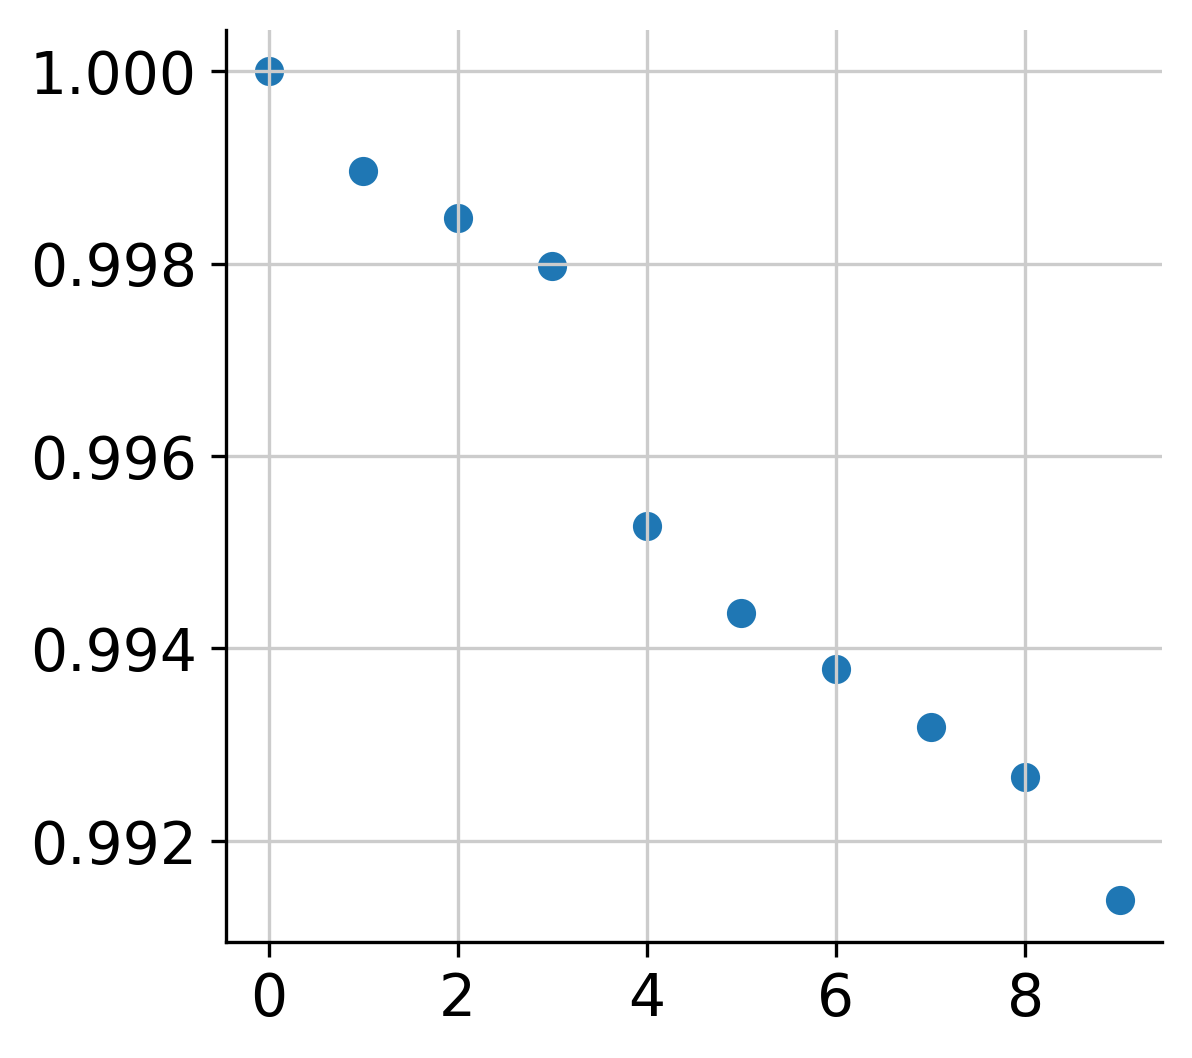

In [10]:
plt.scatter(np.arange(10), dm_res['EigenValues'])

In [11]:
ms_data = palantir.utils.determine_multiscale_space(dm_res)

In [12]:
ms_data.values.shape

(304786, 3)

# Pegasus

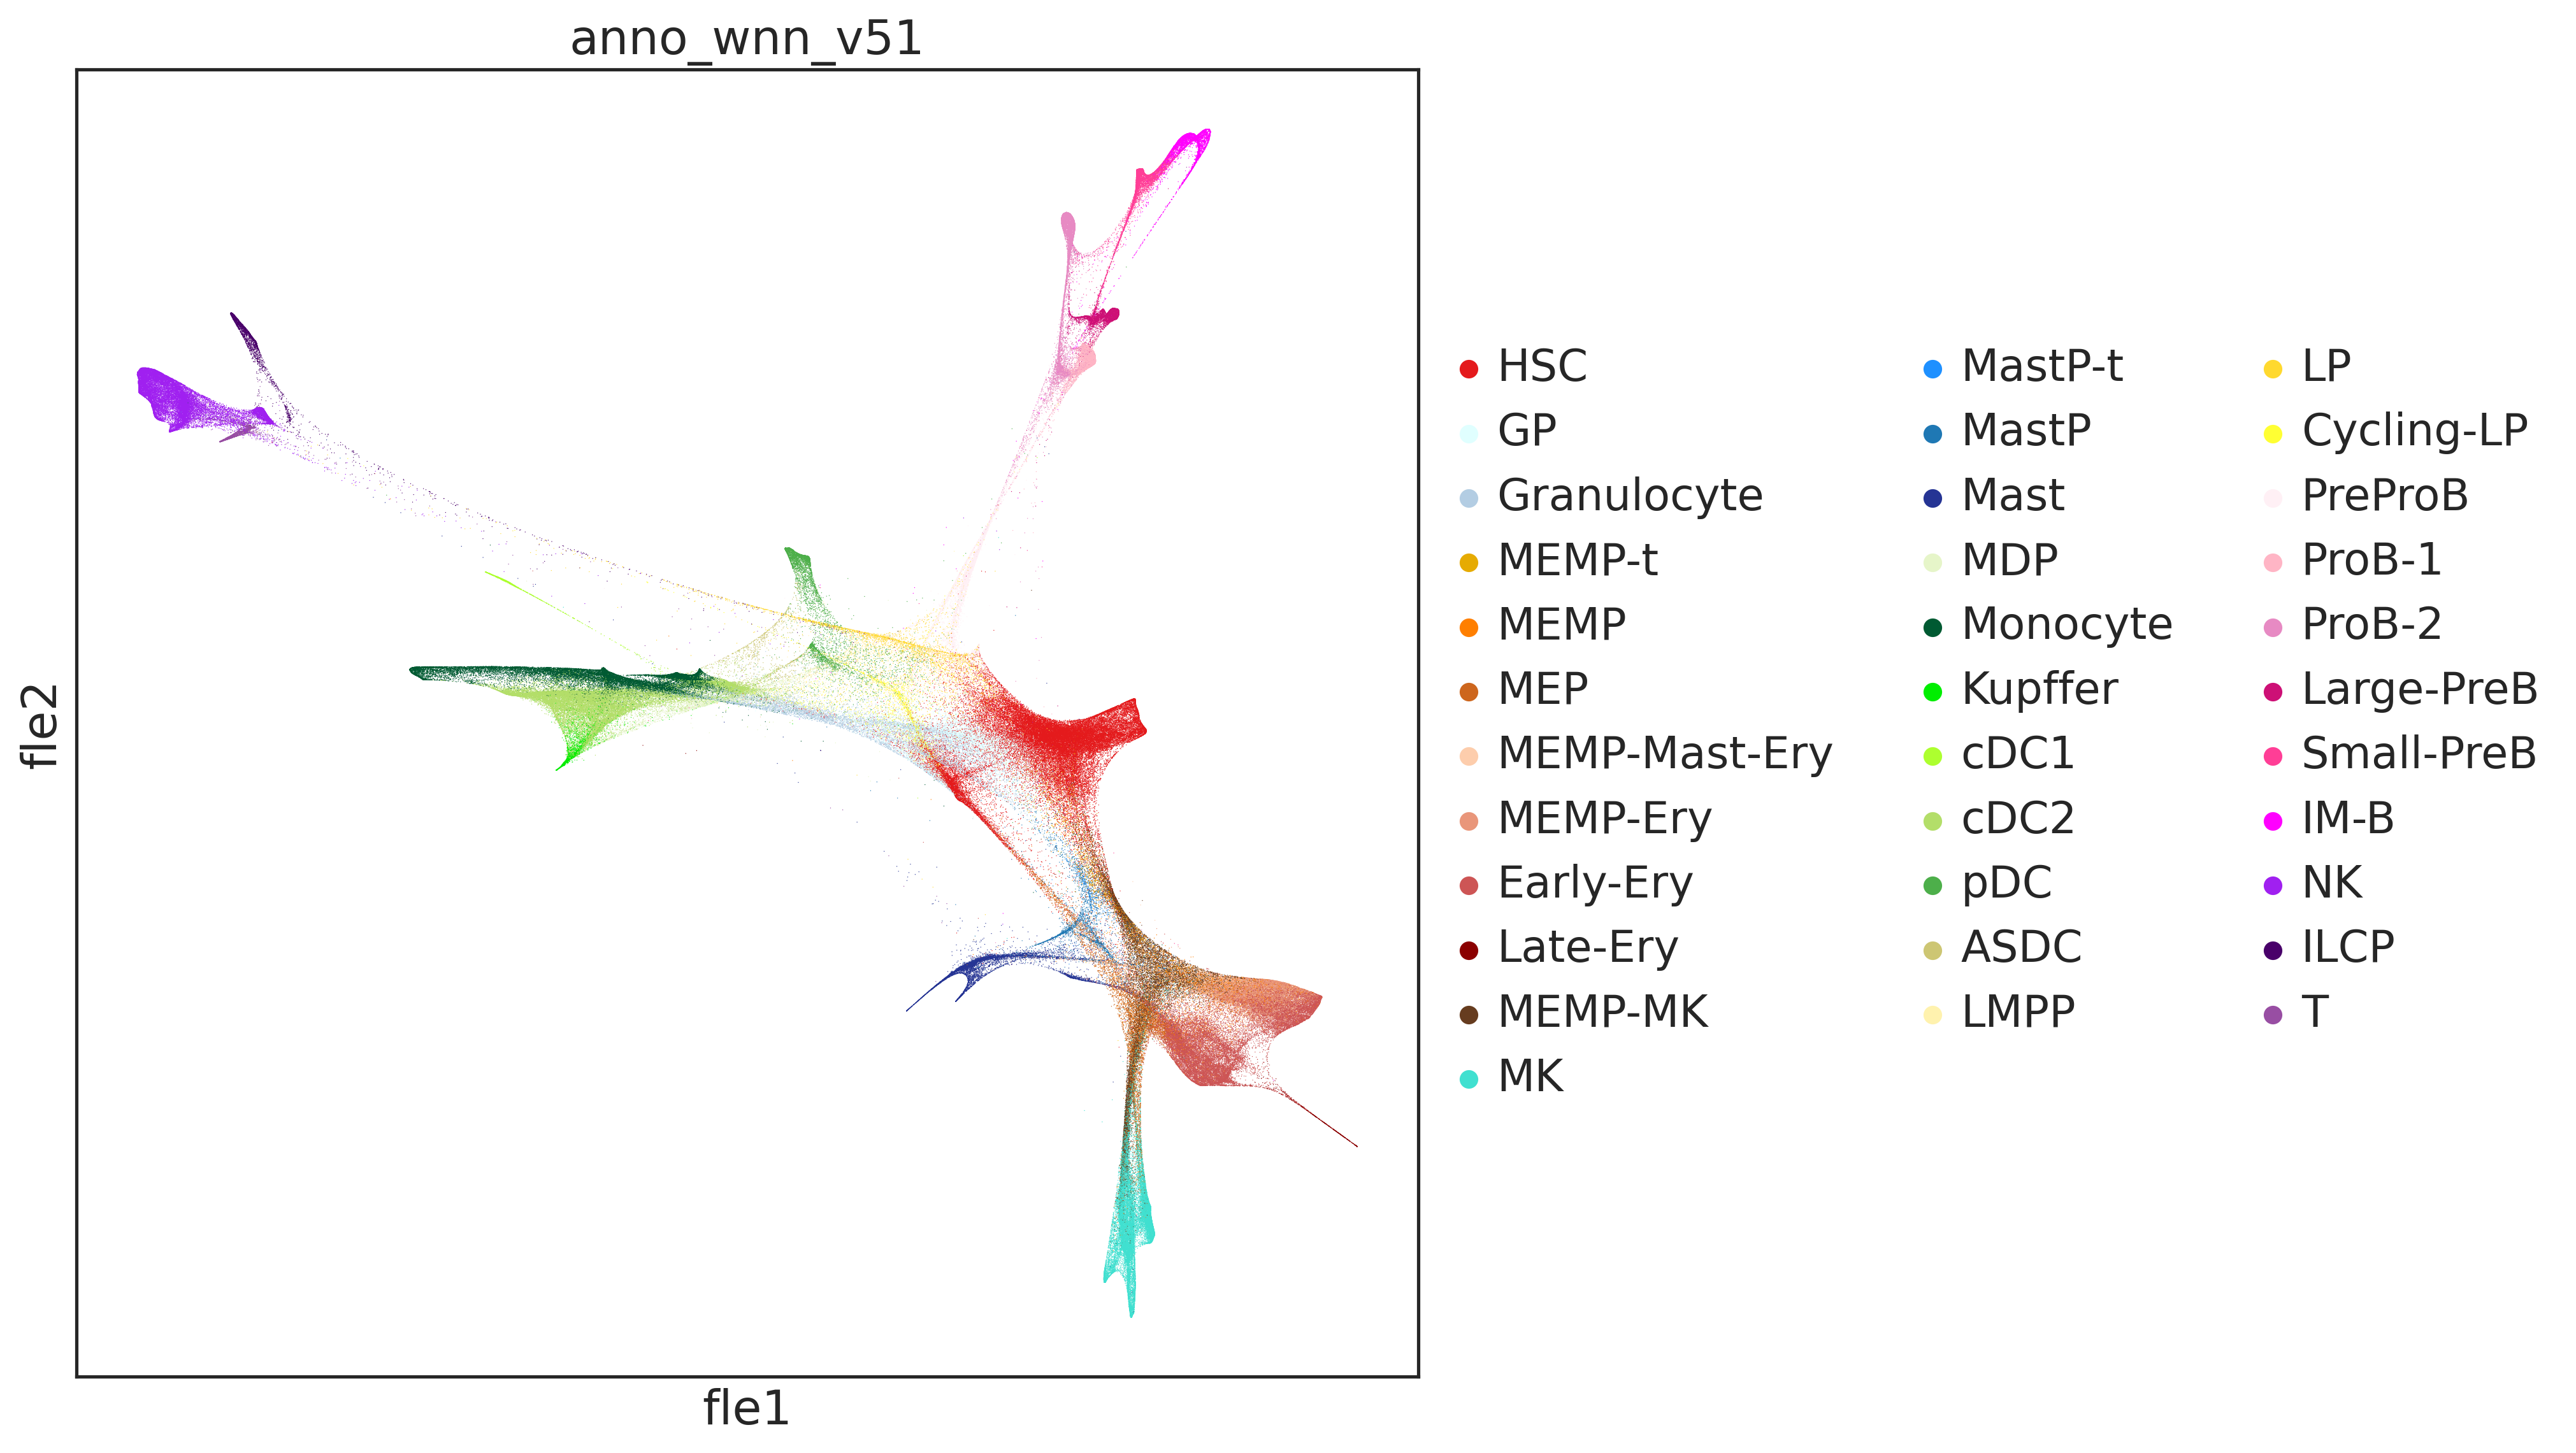

In [20]:
with rc_context({"figure.figsize": (9, 9)}):
    sc.pl.embedding(adata, basis='fle',
                    color=[f"{new_anno}"],
                    show=False,
                    palette = annot2col)
    plt.savefig(f"plots/FL_blood_mvi_diffusion_FLE.pdf", bbox_inches="tight")

In [21]:
n_ctypes, ncols = len(adata.obs[new_anno].unique()), 5
nrows = int(np.ceil(n_ctypes / ncols))
sns.set_theme(style="white", font_scale=1.5)
_, axes = plt.subplots(nrows, ncols, figsize=(ncols * 5.5, nrows * 5))
for i, clust in enumerate(adata.obs[new_anno].cat.categories):
    i += 1
    sc.pl.embedding(adata, basis='fle', color=[new_anno], groups=[clust],
               show=False, use_raw=False, ax=axes[int((i - 1) / ncols), (i - 1) % ncols],
               title=f"{clust}", palette=['red'], ncols=ncols, legend_loc=None, size=10)
plt.tight_layout()
plt.show()